### **1.1. Imports and data loading**

Start by importing packages needed to build the decision tree to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import os

# Import packages for data modeling
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Load the data from the data file into a dataframe.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("./winequality-white.csv", sep=";")

### Splitting between Target and Features

In [3]:
X = data.drop(columns=['quality'])
y = data['quality'].map(lambda value:
    '0' if value <= 4 else
    '1' if value <= 6 else
    '2').astype(int).values
feature_names = X.columns

data['quality'] = y

### **1.2. Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [4]:
# Display first few rows
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        1  
1      9.5        1  
2     10.1        1  
3      9.9        1  
4      9.9        1

Get the number of rows and columns in the dataset.

In [5]:
# Get number of rows and columns
data.shape

(4898, 12)

Get basic information about the dataset.

In [6]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     1.179053  
std       0.151001     0.114126     1.230621     0.470917  
min       2.720000     0.220000     8.000000     0.000000  
25%       3.090000     0.410000     9.500000     1.000000  
50%       3.180000     0.470000    10.400000     1.000000  
75%       3.280000     0.550000    11.400000     1.000000  
max       3.820000     1.080000    14.200000     2.000000

Check for and handle missing values

In [8]:
# Check for missing values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Comment:** There is no missing values in the dataset

Check for and handle duplicates

In [9]:
# Check for duplicates
data.duplicated().sum()

np.int64(937)

**Comment:** Looking at the dataset, we notice that we have 937 duplicates for the white one. It is true that a sample with duplicates will be biased towards them , but if they appear as part of a natural sampling then they do add more information and hence should be kept. Since there is no information about how the dataset samples were taken , we assume that we are in the second case and hence keep the duplicates.

**Comment:** Decision tree is robust to outliers, so there is no need to impute or drop any values based on where they fall in their distribution.

Check unique values.

In [10]:
# Get unique values in the 'quality' column
unique_values = data['quality'].unique()

# Print the unique values
print("Unique values in the 'quality' column:")
print(unique_values)

Unique values in the 'quality' column:
[1 2 0]


In [11]:
# Check class balance
data["quality"].value_counts(normalize=True)

quality
1    0.746223
2    0.216415
0    0.037362
Name: proportion, dtype: float64

- Class `1` (from `5` to `6`) has the highest proportion (74.62%).
- Class `0` (from `0` to `4`) has the lowest proportion (3.74%).
- The proportions vary significantly, with some classes having very few examples compared to the dominant classes.

Hence, the classes in the `quality` column are imbalanced.

**Comment:**

### **2.1. Preparing training and test datasets**

Visualize the class distribution in the original dataset

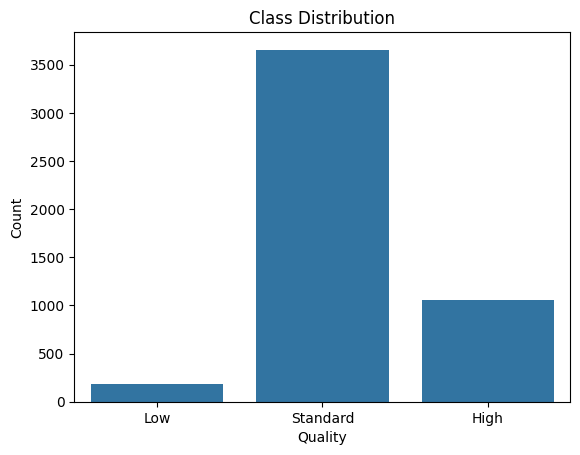

In [72]:
sns.countplot(data=data, x='quality')
plt.title('Class Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Standard', 'High'])
plt.show()

Shuffle the dataset before splitting

Assign target variable.

**Note:**
In this case, the target variable is `label_column`.
* `0` represents wine quality from `0` to `4`.
* `1` represents wine quality from `5` to `6`.
* `2` represents wine quality from `7` to `10`.

Isolate the features.

In [73]:
label = data['quality']

In [74]:
# Isolate features
feature_df = data.drop(['quality'], axis=1)

# Display first few rows of features dataframe
feature_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9

In [75]:
# Function for visualizing class distributions in training and test sets
def visualize_distributions(y_train, y_test):

    # Combine data into a DataFrame for visualization
    data = pd.DataFrame({
        'Labels': pd.concat([y_train, y_test], axis=0),
        'Dataset': ['Train'] * len(y_train) + ['Test'] * len(y_test)
    })

    # Create the plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    for idx, dataset in enumerate(['Train', 'Test']):
        sns.countplot(data=data[data['Dataset'] == dataset], x='Labels', ax=ax[idx])
        ax[idx].set_title(f'{dataset} Label Distribution')
        ax[idx].set_xlabel(f'{dataset} Labels')
        ax[idx].set_ylabel('Count')
        ax[idx].set_xticks(ticks=[0, 1, 2], labels=['Low', 'Standard', 'High'])

    plt.tight_layout()
    plt.show()

Split data with train/test ratio: 40/60

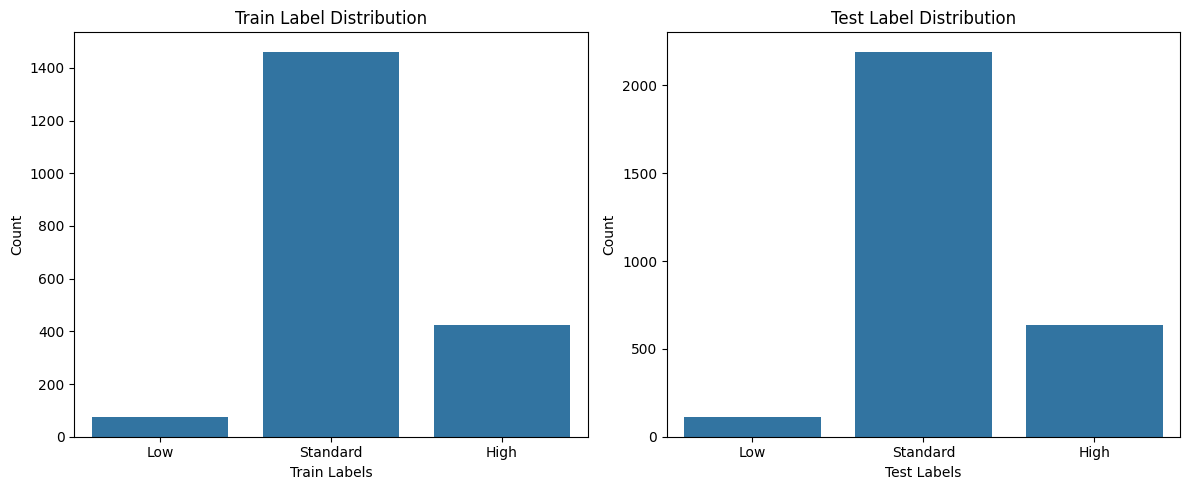

In [76]:
# Visualize the class distributions in the training set and test set
feature_train_1, feature_test_1, label_train_1, label_test_1 = train_test_split(feature_df, label, test_size=0.6, random_state=0, shuffle=True, stratify=label)
visualize_distributions(label_train_1, label_test_1)

Split data with train/test ratio: 60/40

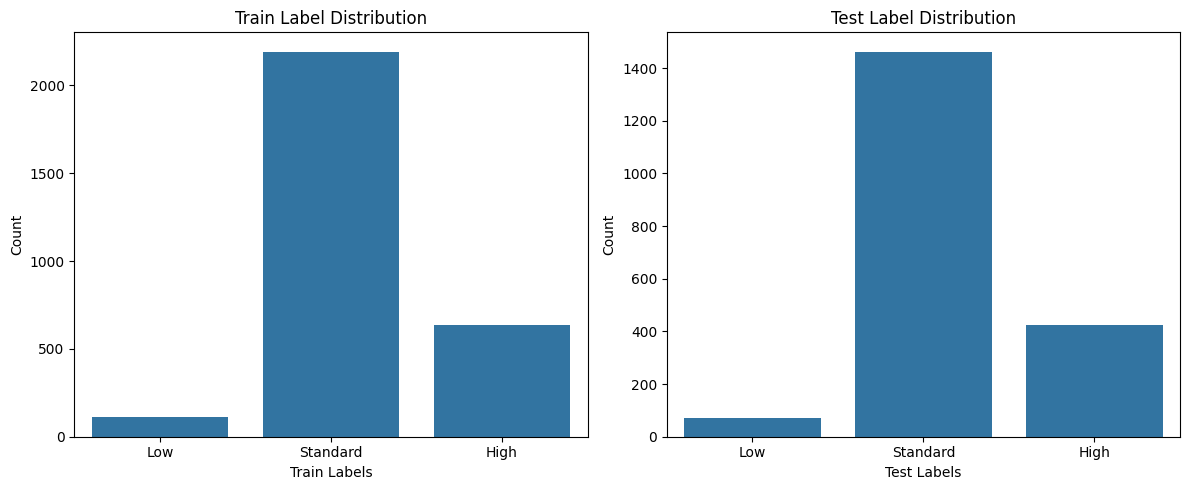

In [77]:
# Visualize the class distributions in the training set and test set
feature_train_2, feature_test_2, label_train_2, label_test_2 = train_test_split(feature_df, label, test_size=0.4, random_state=0, shuffle=True, stratify=label)
visualize_distributions(label_train_2, label_test_2)

Split data with train/test ratio: 80/20

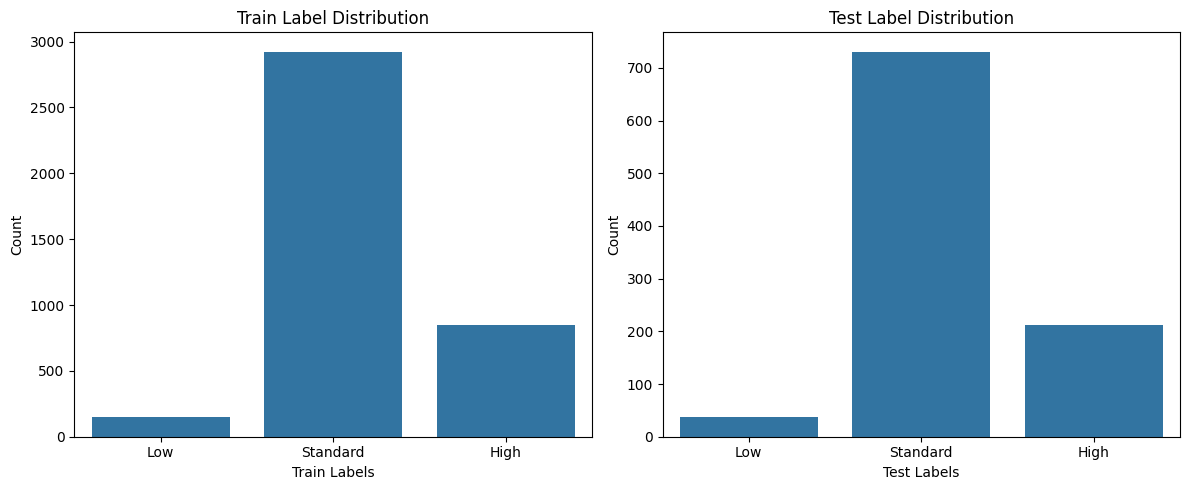

In [78]:
# Visualize the class distributions in the training set and test set
feature_train_3, feature_test_3, label_train_3, label_test_3 = train_test_split(feature_df, label, test_size=0.2, random_state=0, shuffle=True, stratify=label)
visualize_distributions(label_train_3, label_test_3)

Split data with train/test ratio: 90/10

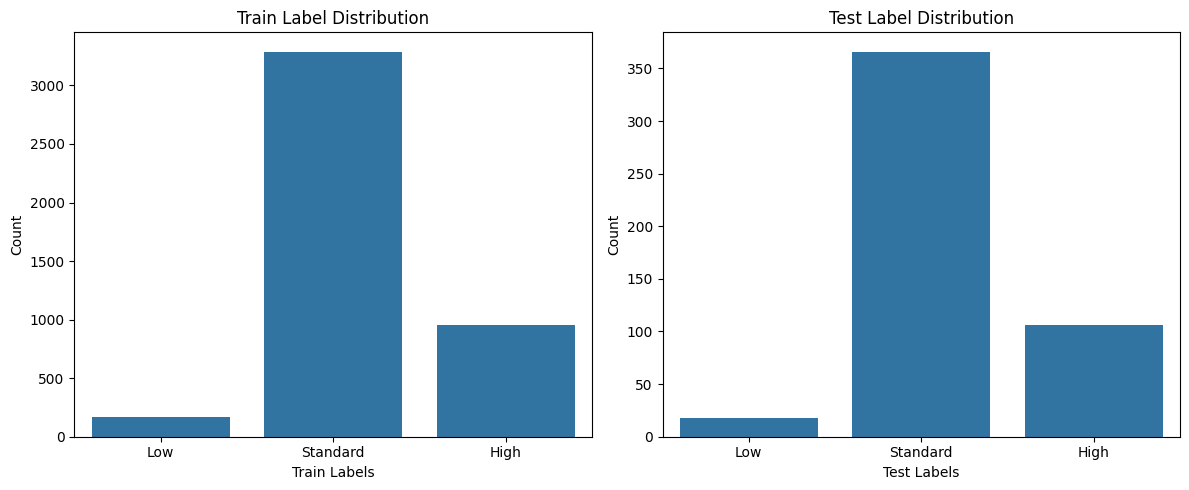

In [79]:
# Visualize the class distributions in the training set and test set
feature_train_4, feature_test_4, label_train_4, label_test_4 = train_test_split(feature_df, label, test_size=0.1, random_state=0, shuffle=True, stratify=label)
visualize_distributions(label_train_4, label_test_4)

### **2.2. Building and Visualizing the Decision Tree Classifiers**

For the the dataset 1 (40/60)

In [20]:
# Instantiate the model
decision_tree_1 = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Fit the model to training data
decision_tree_1.fit(feature_train_1, label_train_1)

DecisionTreeClassifier(criterion='entropy', random_state=0)

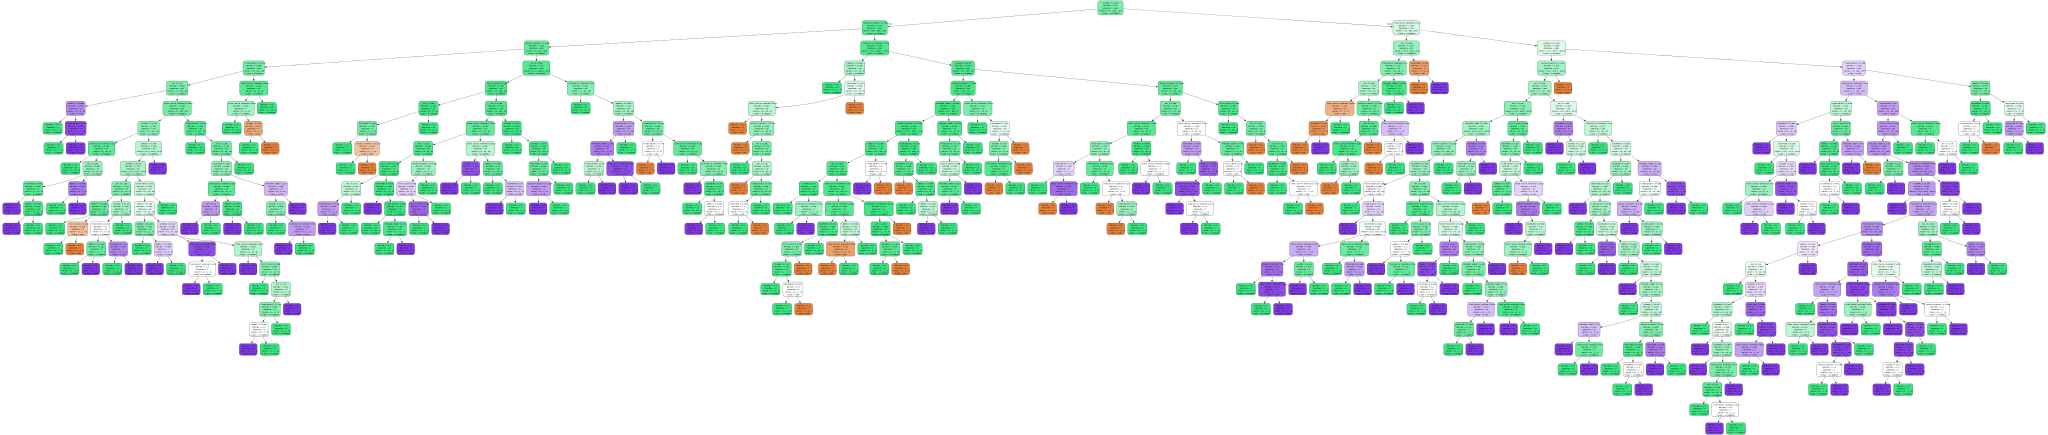

In [21]:
# Visualize the decision tree
dot_data = export_graphviz(decision_tree_1,
                feature_names=feature_train_1.columns,
                class_names=['Low', 'Standard', 'High'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
graph = graphviz.Source(dot_data)
graph

In [22]:
# Ensure the directory exists
output_dir = "./Decision Tree/40_60"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/40_60.


For the dataset 2 (60/40)

In [23]:
# Instantiate the model
decision_tree_2 = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Fit the model to training data
decision_tree_2.fit(feature_train_2, label_train_2)

DecisionTreeClassifier(criterion='entropy', random_state=0)

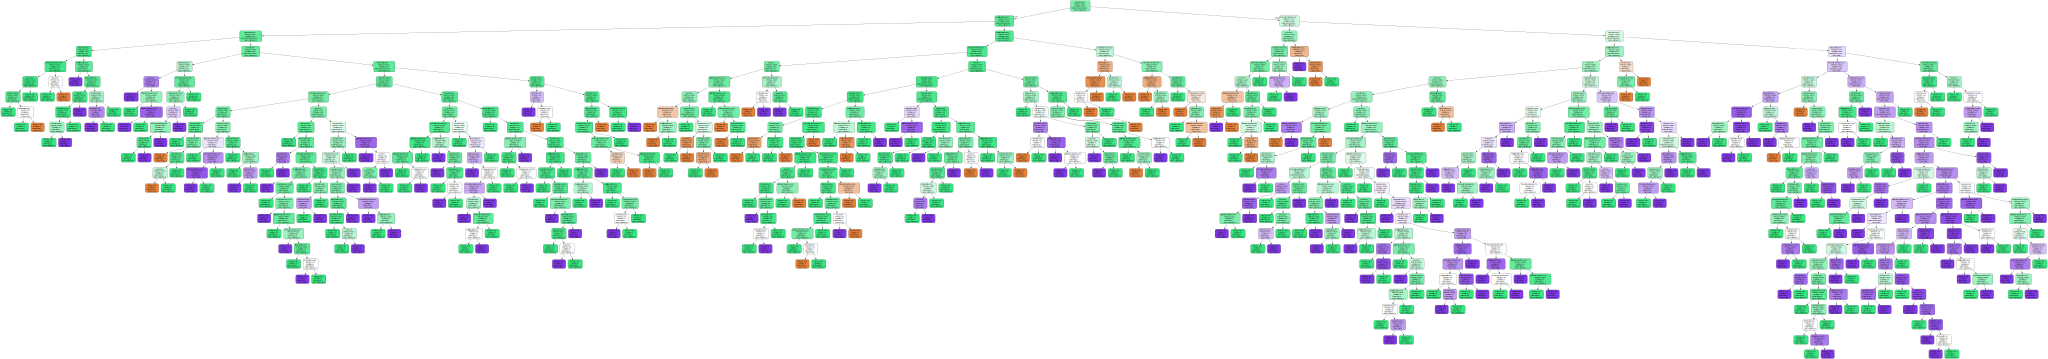

In [24]:
# Visualize the decision tree
dot_data = export_graphviz(decision_tree_2,
                feature_names=feature_train_2.columns,
                class_names=['Low', 'Standard', 'High'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
graph = graphviz.Source(dot_data)
graph

In [25]:
# Ensure the directory exists
output_dir = "./Decision Tree/60_40"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/60_40.


For the dataset 3 (80/20)

In [26]:
# Instantiate the model
decision_tree_3 = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Fit the model to training data
decision_tree_3.fit(feature_train_3, label_train_3)

DecisionTreeClassifier(criterion='entropy', random_state=0)

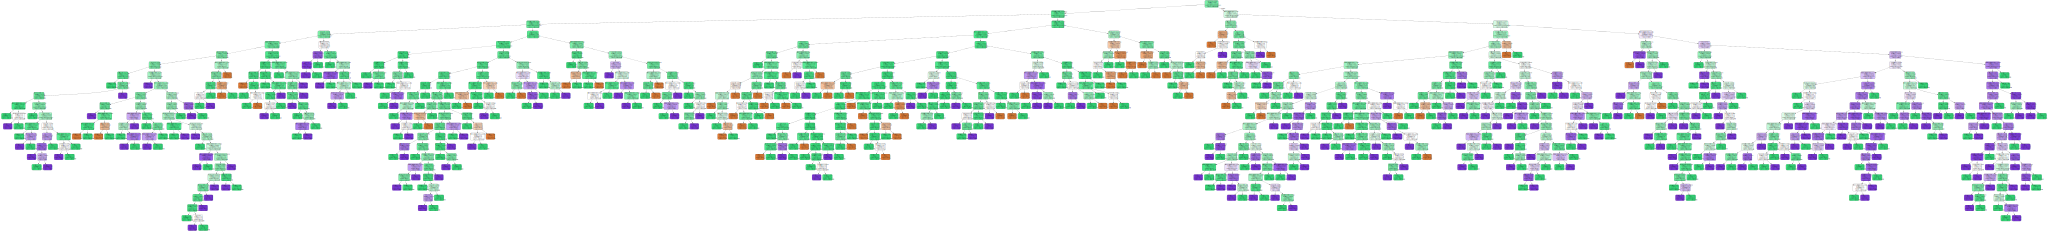

In [27]:
# Visualize the decision tree
dot_data = export_graphviz(decision_tree_3,
                feature_names=feature_train_3.columns,
                class_names=['Low', 'Standard', 'High'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
graph = graphviz.Source(dot_data)
graph

In [28]:
# Ensure the directory exists
output_dir = "./Decision Tree/80_20"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20.


For the dataset 4 (90/10)

In [29]:
# Instantiate the model
decision_tree_4 = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Fit the model to training data
decision_tree_4.fit(feature_train_4, label_train_4)

DecisionTreeClassifier(criterion='entropy', random_state=0)

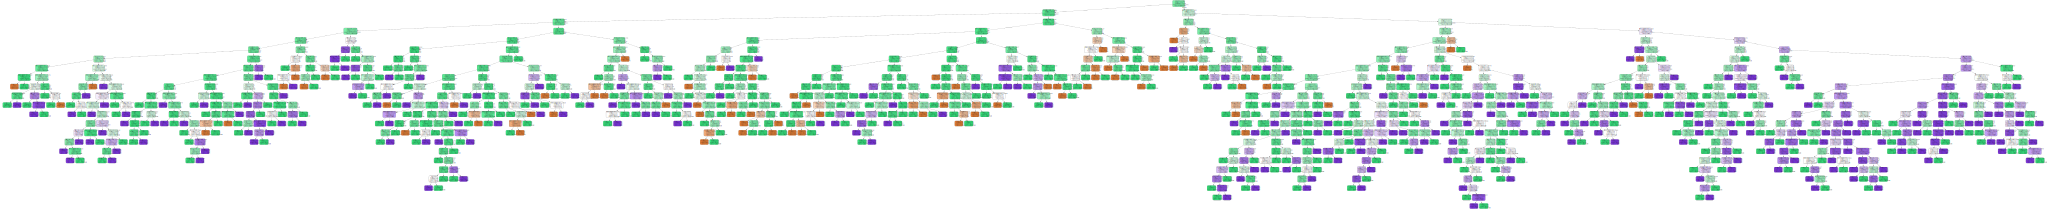

In [30]:
# Visualize the decision tree
dot_data = export_graphviz(decision_tree_4,
                feature_names=feature_train_4.columns,
                class_names=['Low', 'Standard', 'High'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
graph = graphviz.Source(dot_data)
graph

In [31]:
# Ensure the directory exists
output_dir = "./Decision Tree/90_10"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/90_10.


### **2.3. Evaluating the decision tree classifiers**

Function for plotting the confusion matrix

In [32]:
def conf_matrix_plot(model, y_pred, y_data, display_labels):
    '''
    Accepts as argument model object, y_pred, and y data (label test).
    Returns a plot of confusion matrix for predictions on y data.
    '''

    cm = confusion_matrix(y_data, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=display_labels)

    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()

For the dataset 1 (40/60)

In [33]:
label_pred_1 = decision_tree_1.predict(feature_test_1)

In [34]:
# Create the classification report
target_labels = ['Low', 'Standard', 'High']
print(classification_report(label_test_1, label_pred_1, target_names=target_labels))

              precision    recall  f1-score   support

         Low       0.23      0.19      0.21       110
    Standard       0.83      0.86      0.85      2193
        High       0.57      0.53      0.55       636

    accuracy                           0.76      2939
   macro avg       0.54      0.53      0.53      2939
weighted avg       0.75      0.76      0.76      2939



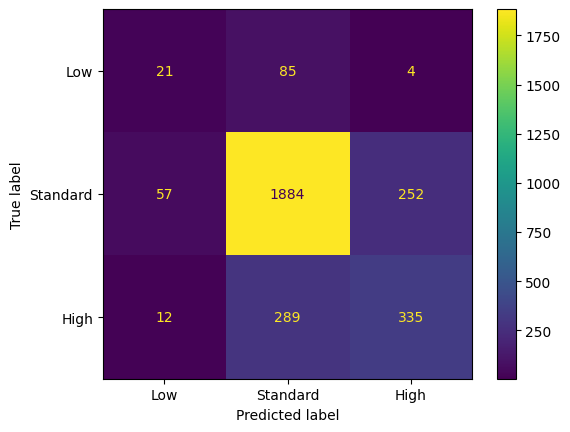

In [35]:
# Create the confusion matrix
display_labels = ['Low', 'Standard', 'High']
conf_matrix_plot(decision_tree_1, label_pred_1, label_test_1, display_labels)

For the dataset 2 (60/40)

In [36]:
label_pred_2 = decision_tree_2.predict(feature_test_2)

In [37]:
# Create the classification report
target_labels = ['Low', 'Standard', 'High']
print(classification_report(label_test_2, label_pred_2, target_names=target_labels))

              precision    recall  f1-score   support

         Low       0.25      0.25      0.25        73
    Standard       0.85      0.84      0.85      1463
        High       0.57      0.58      0.58       424

    accuracy                           0.77      1960
   macro avg       0.56      0.56      0.56      1960
weighted avg       0.77      0.77      0.77      1960



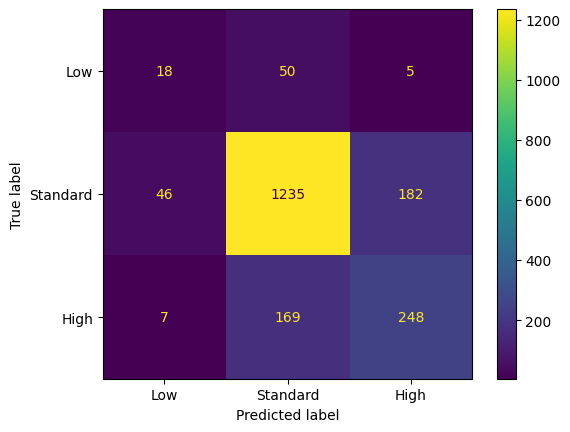

In [38]:
# Create the confusion matrix
display_labels = ['Low', 'Standard', 'High']
conf_matrix_plot(decision_tree_2, label_pred_2, label_test_2, display_labels)

For the dataset 3 (80/20)

In [39]:
label_pred_3 = decision_tree_3.predict(feature_test_3)

In [40]:
# Create the classification report
target_labels = ['Low', 'Standard', 'High']
print(classification_report(label_test_3, label_pred_3, target_names=target_labels))

              precision    recall  f1-score   support

         Low       0.29      0.32      0.30        37
    Standard       0.86      0.83      0.85       731
        High       0.57      0.61      0.59       212

    accuracy                           0.77       980
   macro avg       0.57      0.59      0.58       980
weighted avg       0.77      0.77      0.77       980



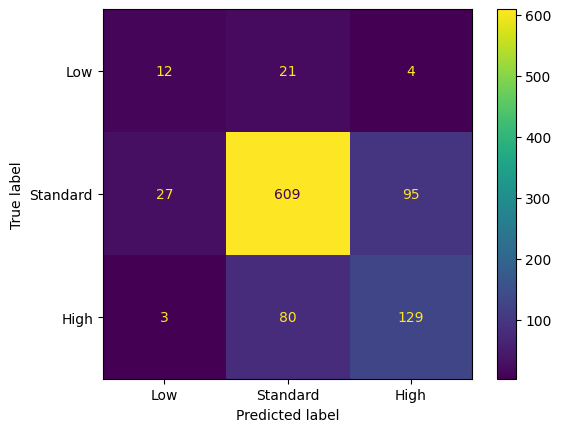

In [41]:
# Create the confusion matrix
display_labels = ['Low', 'Standard', 'High']
conf_matrix_plot(decision_tree_3, label_pred_3, label_test_3, display_labels)

For the dataset 4 (90/10)

In [42]:
label_pred_4 = decision_tree_4.predict(feature_test_4)

In [43]:
# Create the classification report
target_labels = ['Low', 'Standard', 'High']
print(classification_report(label_test_4, label_pred_4, target_names=target_labels))

              precision    recall  f1-score   support

         Low       0.40      0.33      0.36        18
    Standard       0.87      0.85      0.86       366
        High       0.59      0.65      0.62       106

    accuracy                           0.79       490
   macro avg       0.62      0.61      0.62       490
weighted avg       0.79      0.79      0.79       490



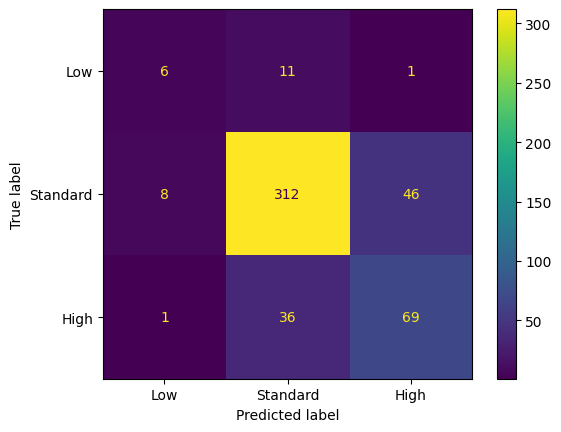

In [44]:
# Create the confusion matrix
display_labels = ['Low', 'Standard', 'High']
conf_matrix_plot(decision_tree_4, label_pred_4, label_test_4, display_labels)

### **2.4. The depth and accuracy of a decision tree**

This task focuses on the 80/20 training and test sets

In [45]:
feature_train = feature_train_3.copy()
feature_test = feature_test_3.copy()
label_train = label_train_3.copy()
label_test = label_test_3.copy()

accuracy_scores = []

In [46]:
def evaluate_decision_tree(feature_train, label_train, feature_test, label_test, max_depth):
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=0)
    dt.fit(feature_train, label_train)
    label_pred = dt.predict(feature_test)
    acc_score = accuracy_score(y_true=label_test, y_pred=label_pred)
    dot_data = export_graphviz(dt,
                feature_names=feature_train.columns,
                class_names=['Low', 'Standard', 'High'],
                filled=True, rounded=True,
                special_characters=True,
                out_file=None,
            )
    graph = graphviz.Source(dot_data)

    return acc_score, graph


When `max_depth` = None:

In [47]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, None)
accuracy_scores.append(acc_score)

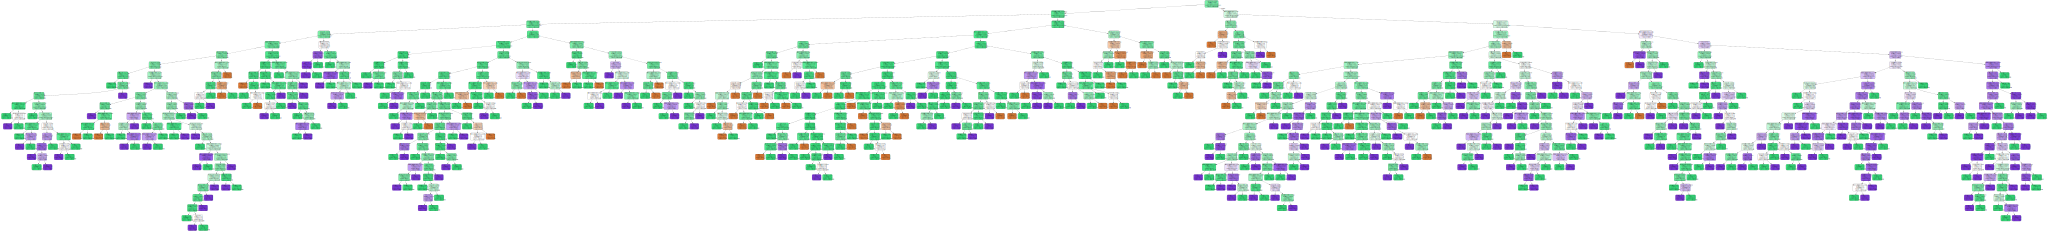

In [48]:
graph

In [49]:
output_dir = "./Decision Tree/80_20_Depth/None"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20_Depth/None.


When `max_depth` = 2:

In [50]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 2)
accuracy_scores.append(acc_score)

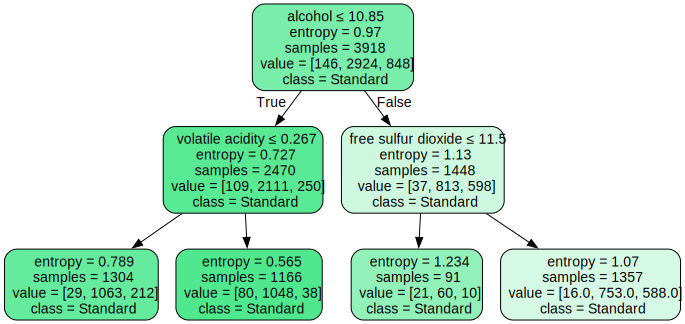

In [51]:
graph

In [52]:
output_dir = "./Decision Tree/80_20_Depth/2"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20_Depth/2.


When `max_depth` = 3:

In [53]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 3)
accuracy_scores.append(acc_score)

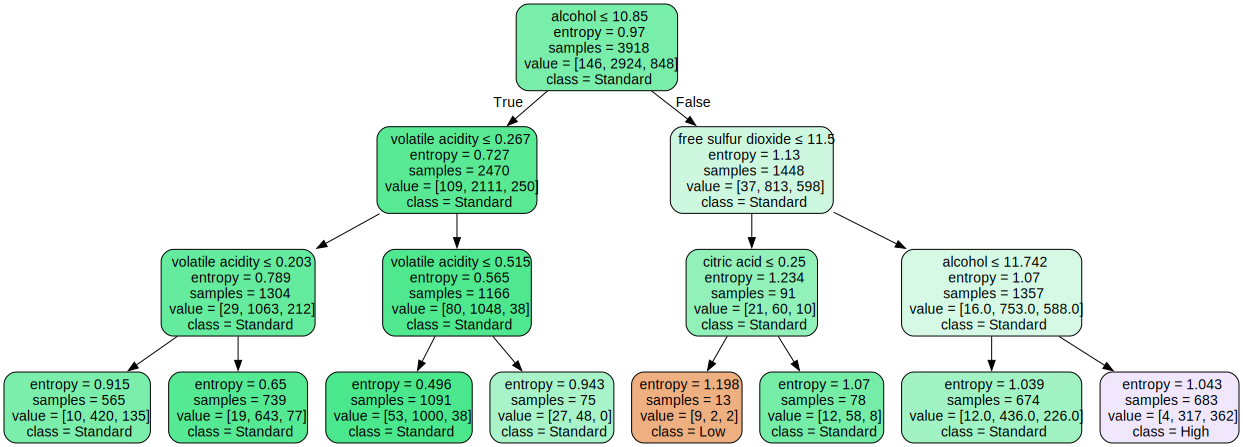

In [54]:
graph

In [55]:
output_dir = "./Decision Tree/80_20_Depth/3"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20_Depth/3.


When `max_depth` = 4:

In [56]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 4)
accuracy_scores.append(acc_score)

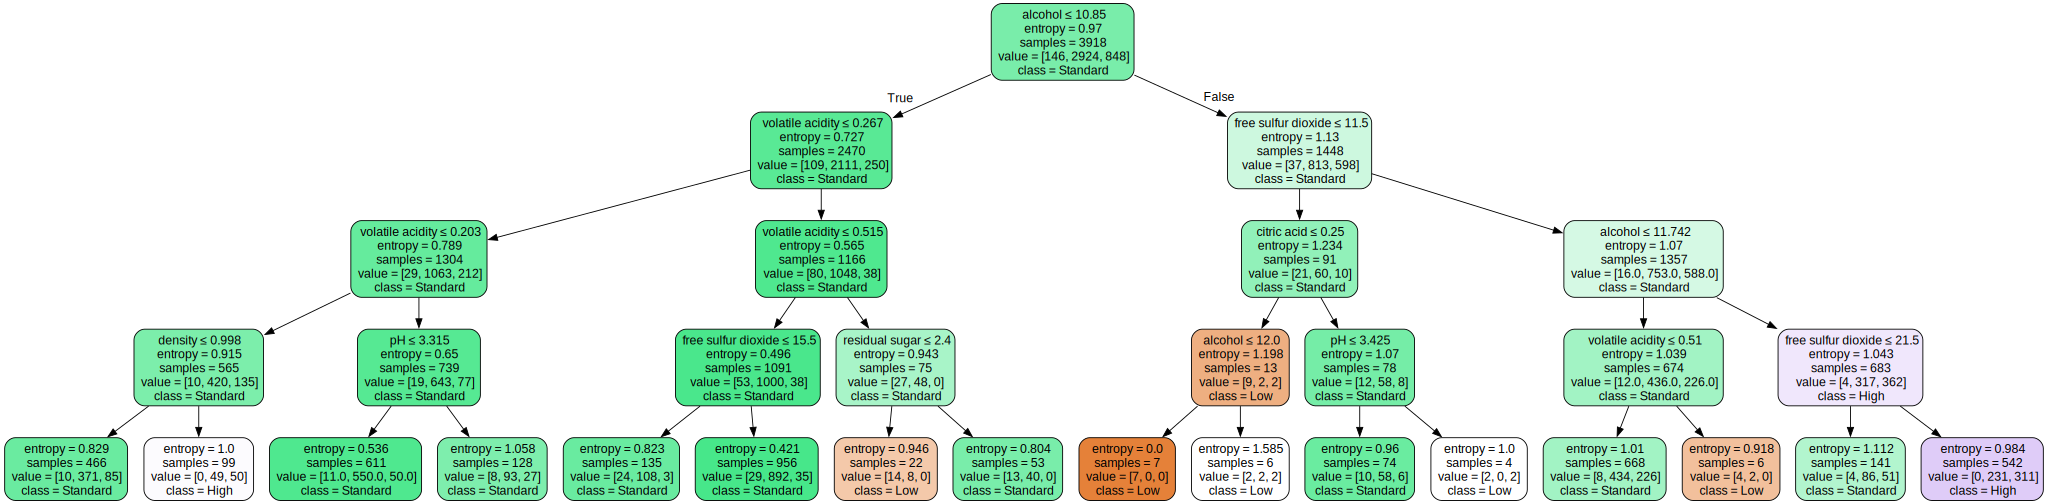

In [57]:
graph

In [58]:
output_dir = "./Decision Tree/80_20_Depth/4"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20_Depth/4.


When `max_depth` = 5:

In [59]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 5)
accuracy_scores.append(acc_score)

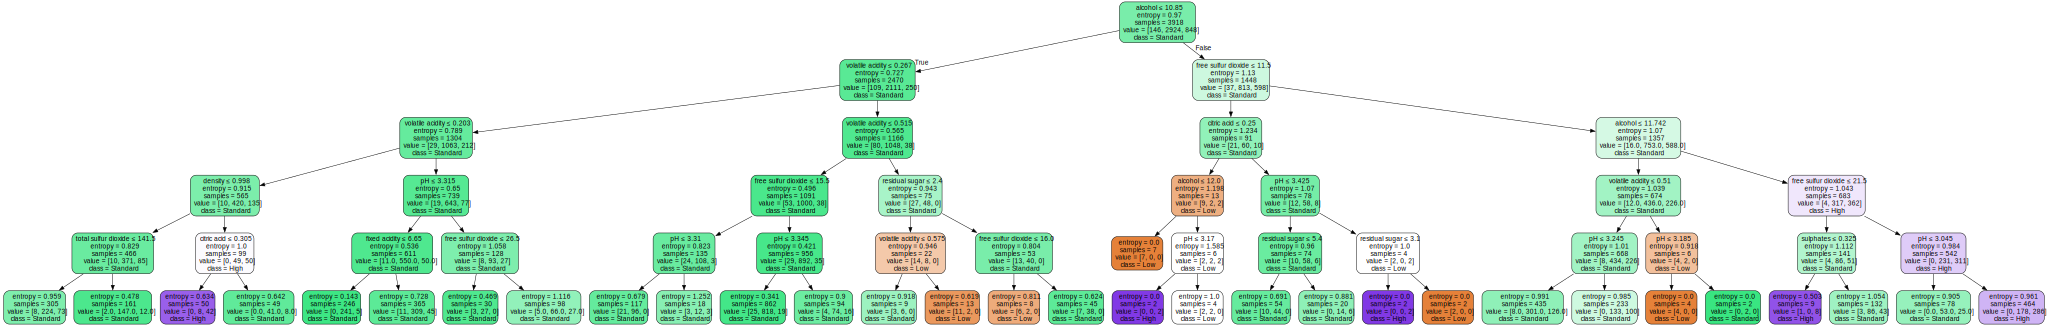

In [60]:
graph

In [61]:
output_dir = "./Decision Tree/80_20_Depth/5"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20_Depth/5.


When `max_depth` = 6:

In [62]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 6)
accuracy_scores.append(acc_score)

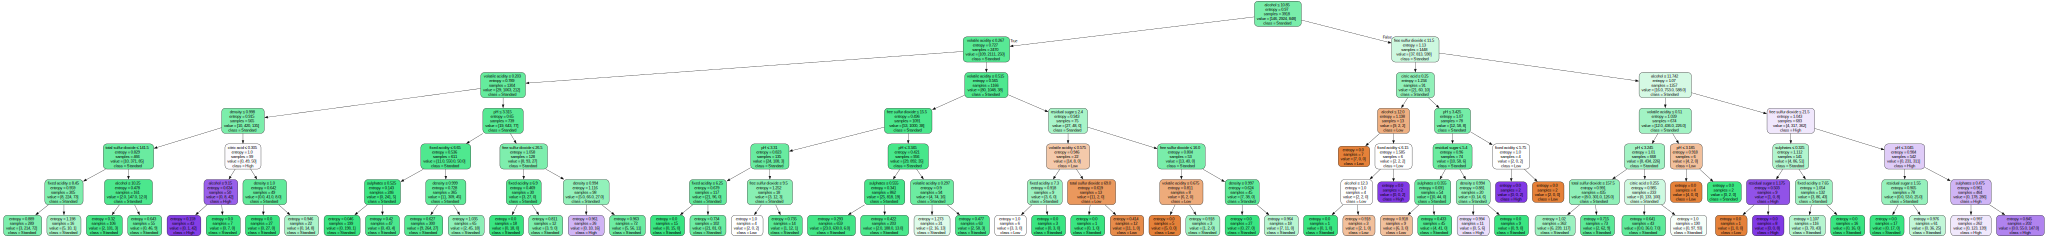

In [63]:
graph

In [64]:
output_dir = "./Decision Tree/80_20_Depth/6"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20_Depth/6.


When `max_depth` = 7:

In [65]:
acc_score, graph = evaluate_decision_tree(feature_train, label_train, feature_test, label_test, 7)
accuracy_scores.append(acc_score)

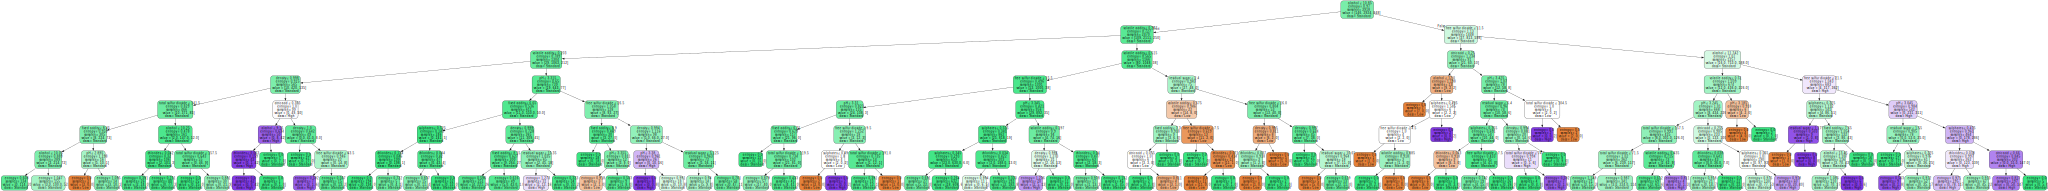

In [66]:
graph

In [67]:
output_dir = "./Decision Tree/80_20_Depth/7"
os.makedirs(output_dir, exist_ok=True)
# Save the decision tree as a PDF (vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="pdf")
# Save as an SVG (another vector format)
graph.render(filename=f"{output_dir}/decision_tree", format="svg")

print(f"Decision tree saved as PDF and/or SVG in {output_dir}.")

Decision tree saved as PDF and/or SVG in ./Decision Tree/80_20_Depth/7.


Report the `accuracy_score` (on the test set) of the decision tree classifier for each value of
the `max_depth` parameter in a table

In [68]:
max_depth_values = ['None', 2, 3, 4, 5, 6, 7]
accuracy_table = pd.DataFrame({
    'max_depth': max_depth_values,
    'Accuracy': accuracy_scores
})
accuracy_table

max_depth  Accuracy
0      None  0.765306
1         2  0.745918
2         3  0.760204
3         4  0.758163
4         5  0.757143
5         6  0.758163
6         7  0.764286

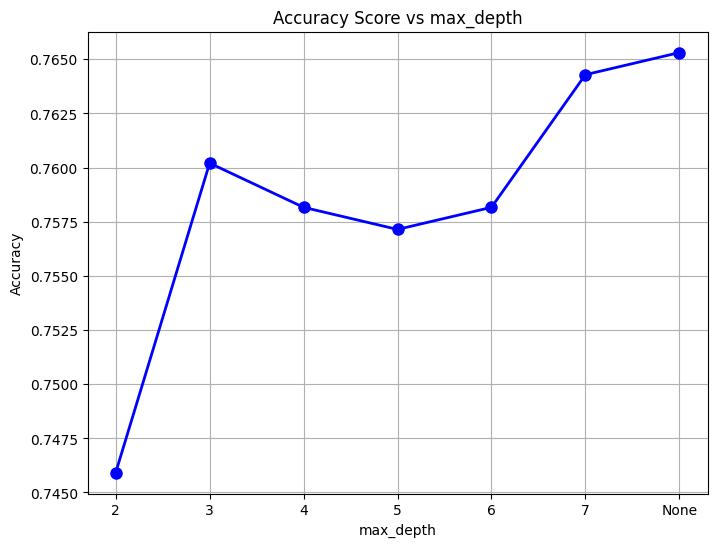

In [69]:
# Plot the accuracy scores
accuracy_scores = accuracy_scores[1:] + [accuracy_scores[0]]
max_depth_values = [2, 3, 4, 5, 6, 7, 'None']
tickvalues = range(0,len(max_depth_values))

plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, accuracy_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Accuracy Score vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(ticks=tickvalues, labels=max_depth_values)
plt.show()

**Insights:**